# Chapter 18

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as tsa

In [2]:
# Exercise 1
wageprc = pd.read_stata("./stata/WAGEPRC.DTA")
X = sm.add_constant(wageprc[["gwage", "gprice_1"]])
model = sm.OLS(wageprc.gprice, X, missing="drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 gprice   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     116.8
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           1.21e-37
Time:                        12:00:56   Log-Likelihood:                 1298.5
No. Observations:                 284   AIC:                            -2591.
Df Residuals:                     281   BIC:                            -2580.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.000      4.675      0.000       0.001       0.002
gwage          0.0814      0.031      2.620      0.009       0.020       0.143
gprice_1       0.6396      0.045     14.331      0.000       0.552       0.727
==============================================================================
Omnibus:                       51.043   Durbin-Watson:                   2.363
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              378.052
Skew:                           0.433   Prob(JB):                     8.07e-83
Kurtosis:                       8.586   Cond. No.                         304.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
model.params[1] / (1 - model.params[2])

0.22597844766905975

In [4]:
X = sm.add_constant(wageprc[["gwage", "gprice_1", "gwage_1"]])
model = sm.OLS(wageprc.gprice, X, missing="drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 gprice   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     79.44
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           3.30e-37
Time:                        12:00:56   Log-Likelihood:                 1300.1
No. Observations:                 284   AIC:                            -2592.
Df Residuals:                     280   BIC:                            -2578.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.000      3.613      0.000       0.000       0.002
gwage          0.0898      0.031      2.866      0.004       0.028       0.151
gprice_1       0.6186      0.046     13.422      0.000       0.528       0.709
gwage_1        0.0551      0.032      1.740      0.083      -0.007       0.117
==============================================================================
Omnibus:                       50.774   Durbin-Watson:                   2.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              347.067
Skew:                           0.463   Prob(JB):                     4.32e-76
Kurtosis:                       8.336   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
(model.params[1] + model.params[3]) / (1 - model.params[2])

0.3799599608144582

C1.i Estimated IP is 0.081 and estimated LRP is 0.226.

C1.ii The IP in the previous problem is 0.119 and the LRP is 1.172. Both are much higher than the geometric distributed lag.

C1.iii The estimated IP is 0.09 and the LRP is 0.380. These are closer to (but higher than) (i) and still well below the results from 5.11 (previous problem).

In [6]:
# Exercise 2
hseinv = pd.read_stata("./stata/HSEINV.DTA")
hseinv["ginvpc_1"] = hseinv["ginvpc"].shift(1)
hseinv["ginvpc_2"] = hseinv["ginvpc"].shift(2)
X = sm.add_constant(hseinv[["linvpc_1", "ginvpc_1", "ginvpc_2", "t"]])
model = sm.OLS(hseinv.ginvpc, X, missing="drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ginvpc   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     6.592
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           0.000486
Time:                        12:00:57   Log-Likelihood:                 31.647
No. Observations:                  39   AIC:                            -53.29
Df Residuals:                      34   BIC:                            -44.98
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7864      0.170     -4.626      0.000      -1.132      -0.441
linvpc_1      -0.9558      0.198     -4.833      0.000      -1.358      -0.554
ginvpc_1       0.5317      0.162      3.291      0.002       0.203       0.860
ginvpc_2       0.2900      0.165      1.761      0.087      -0.045       0.625
t              0.0068      0.002      3.177      0.003       0.002       0.011
==============================================================================
Omnibus:                        0.717   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.699   Jarque-Bera (JB):                0.330
Skew:                          -0.223   Prob(JB):                        0.848
Kurtosis:                       3.058   Cond. No.                         421.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
hseinv["gprice_1"] = hseinv["gprice"].shift(1)
hseinv["gprice_2"] = hseinv["gprice"].shift(2)
X = sm.add_constant(hseinv[["lprice_1", "gprice_1", "gprice_2", "t"]])
model = sm.OLS(hseinv.gprice, X, missing="drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 gprice   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     2.131
Date:                Mon, 28 Nov 2022   Prob (F-statistic):             0.0983
Time:                        12:00:57   Log-Likelihood:                 105.65
No. Observations:                  39   AIC:                            -201.3
Df Residuals:                      34   BIC:                            -193.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0404      0.019     -2.071      0.046      -0.080      -0.001
lprice_1      -0.2216      0.092     -2.409      0.022      -0.409      -0.035
gprice_1       0.3276      0.155      2.111      0.042       0.012       0.643
gprice_2       0.1301      0.149      0.872      0.389      -0.173       0.433
t              0.0010      0.000      1.995      0.054   -1.82e-05       0.002
==============================================================================
Omnibus:                        1.867   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.393   Jarque-Bera (JB):                0.914
Skew:                          -0.064   Prob(JB):                        0.633
Kurtosis:                       3.739   Cond. No.                     1.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C2.i The t-statistic on linvpc_1 is -4.833 which is larger (in absolute value) than -3.41 from Table 18.3 and, in fact, the 1% critical value of -3.96. We can reject the null hypothesis that there is a unit root.

C2.ii Using the same approach the t-statistic is -2.409 which is less (in absolute value) than any critical value we would want to use. We do not have evidence to reject the null hypothesis that there is a unit root for price.

C2.iii The first test gives evidence that there is not a unit root, while the possibility is still open for log(price). It would not make sense to test for cointegration in this case.

In [8]:
# Exercise 3
volat = pd.read_stata("./stata/VOLAT.DTA")
X = sm.add_constant(volat[["pcip_1", "pcip_2", "pcip_3"]])
model = sm.OLS(volat["pcip"], X, missing="drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pcip   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     36.40
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           1.81e-21
Time:                        12:00:57   Log-Likelihood:                -2167.7
No. Observations:                 554   AIC:                             4343.
Df Residuals:                     550   BIC:                             4361.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8042      0.548      3.292      0.001       0.728       2.881
pcip_1         0.3491      0.043      8.210      0.000       0.266       0.433
pcip_2         0.0708      0.045      1.575      0.116      -0.017       0.159
pcip_3         0.0674      0.043      1.584      0.114      -0.016       0.151
==============================================================================
Omnibus:                      184.426   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1740.263
Skew:                           1.179   Prob(JB):                         0.00
Kurtosis:                      11.356   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
volat["pcip_4"] = volat["pcip_3"].shift(1)
X = sm.add_constant(volat[["pcip_1", "pcip_2", "pcip_3", "pcip_4"]])
model = sm.OLS(volat["pcip"], X, missing="drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pcip   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     27.24
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           1.22e-20
Time:                        12:00:58   Log-Likelihood:                -2164.2
No. Observations:                 553   AIC:                             4338.
Df Residuals:                     548   BIC:                             4360.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7873      0.555      3.221      0.001       0.697       2.877
pcip_1         0.3494      0.043      8.179      0.000       0.265       0.433
pcip_2         0.0702      0.045      1.556      0.120      -0.018       0.159
pcip_3         0.0658      0.045      1.457      0.146      -0.023       0.154
pcip_4         0.0043      0.043      0.101      0.920      -0.080       0.088
==============================================================================
Omnibus:                      184.693   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1741.966
Skew:                           1.184   Prob(JB):                         0.00
Kurtosis:                      11.366   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
X = sm.add_constant(
    volat[["pcip_1", "pcip_2", "pcip_3", "pcsp_1", "pcsp_2", "pcsp_3"]])
model = sm.OLS(volat["pcip"], X, missing="drop").fit()
model.f_test("pcsp_1 = pcsp_2 = pcsp_3 = 0")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=5.371828372897618, p=0.001190404630174995, df_denom=547, df_num=3>

In [11]:
volat["ci3_3"] = volat["ci3_2"].shift(1)
X = sm.add_constant(volat[["pcip_1", "pcip_2", "pcip_3", "pcsp_1",
                           "pcsp_2", "pcsp_3", "ci3_1", "ci3_2", "ci3_3"]])
model = sm.OLS(volat["pcip"], X, missing="drop").fit()
model.f_test("pcsp_1 = pcsp_2 = pcsp_3 = 0")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=5.076975015753397, p=0.0017866714063804869, df_denom=544, df_num=3>

C3.i Results above. The 4th lag is significant at the 95% level (i.e. not at all).

C3.ii The joint significance test is significant at the 1% level. The null hypothesis is that all of the coefficients for pcsp are 0 which we reject. Granger causality is defined in 18.51 ($E(y_t|I_{t-1} \neq E(y_t|J_{t-1})$) and, since we have strong evidence that at least one of the coefficients for pcsp is not zero, we conclude that pscp Granger causes pcip.

C3.iii Adding the change in the three-month T-bill does shrink the F-statistic (from 5.37 to 5.08, p-value 0.002) but the joint hypothesis test is still significant even at the 1% level. We still conclude pcsp Granger causes pcip conditional on past $\Delta i3$.

In [12]:
# Exercise 4
fertil3 = pd.read_stata("./stata/FERTIL3.DTA")
X = sm.add_constant(fertil3[["pe", "t", "tsq"]])
model = sm.OLS(fertil3["gfr"], X, missing="drop").fit()
fertil3["u_hat"] = model.resid
fertil3["u_hat_1"] = model.resid.shift(1)
fertil3["delta_u"] = fertil3["u_hat"] - fertil3["u_hat_1"]
fertil3["delta_u_1"] = fertil3["u_hat_1"] - fertil3["u_hat_1"].shift(1)
X = sm.add_constant(fertil3[["u_hat_1", "delta_u_1"]])

sm.OLS(fertil3["delta_u"], X, missing="drop").fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                delta_u   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     4.959
Date:                Mon, 28 Nov 2022   Prob (F-statistic):            0.00980
Time:                        12:00:58   Log-Likelihood:                -228.96
No. Observations:                  70   AIC:                             463.9
Df Residuals:                      67   BIC:                             470.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1224      0.779     -0.157      0.876      -1.676       1.432
u_hat_1       -0.1650      0.060     -2.761      0.007      -0.284      -0.046
delta_u_1      0.2542      0.118      2.161      0.034       0.019       0.489
==============================================================================
Omnibus:                       47.831   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              439.013
Skew:                          -1.588   Prob(JB):                     4.67e-96
Kurtosis:                      14.850   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C4 Results above. The t-statatistic on the lag of the residual is -2.761. The critical value (given in the question) is -4.15, considerably higher than the t-statistic. We fail to reject the null hypothesis of no cointegration between gfr and pe.

In [13]:
# Exercise 5
intqrt = pd.read_stata("./stata/INTQRT.DTA")
intqrt["chy3_2"] = intqrt["chy3_1"].shift(1)
X = sm.add_constant(intqrt[["hy3_1", "chy3", "chy3_1", "chy3_2"]])
model = sm.OLS(intqrt["hy6"], X, missing="drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    hy6   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1551.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           1.17e-99
Time:                        12:00:58   Log-Likelihood:                 84.067
No. Observations:                 121   AIC:                            -158.1
Df Residuals:                     116   BIC:                            -144.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0775      0.028      2.794      0.006       0.023       0.132
hy3_1          1.0271      0.016     65.363      0.000       0.996       1.058
chy3          -1.0211      0.038    -27.171      0.000      -1.096      -0.947
chy3_1        -0.0854      0.037     -2.301      0.023      -0.159      -0.012
chy3_2        -0.1044      0.037     -2.787      0.006      -0.179      -0.030
==============================================================================
Omnibus:                       24.667   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.842
Skew:                          -0.012   Prob(JB):                     2.20e-42
Kurtosis:                       9.169   Cond. No.                         7.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model.t_test("hy3_1 = 1")

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.0271      0.016      1.723      0.088       0.996       1.058

In [15]:
intqrt["hy3_2"] = intqrt["hy3_1"].shift(1)
intqrt["hy6_2"] = intqrt["hy6_1"].shift(1)
intqrt["hy3_3"] = intqrt["hy3_2"].shift(1)
intqrt["hy6_1_less_hy3_2"] = intqrt["hy6_1"] - intqrt["hy3_2"]
intqrt["hy6_2_less_hy3_3"] = intqrt["hy6_2"] - intqrt["hy3_3"]

X = sm.add_constant(intqrt[["chy3_1", "hy6_1_less_hy3_2",
                            "chy3_2", "hy6_2_less_hy3_3"]])
model = sm.OLS(intqrt["chy6"], X, missing="drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   chy6   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     112.5
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           5.62e-39
Time:                        12:00:59   Log-Likelihood:                -38.838
No. Observations:                 121   AIC:                             87.68
Df Residuals:                     116   BIC:                             101.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0704      0.049      1.438      0.153      -0.027       0.167
chy3_1               1.2592      0.278      4.533      0.000       0.709       1.809
hy6_1_less_hy3_2    -0.8158      0.256     -3.186      0.002      -1.323      -0.309
chy3_2               0.2827      0.272      1.039      0.301      -0.256       0.821
hy6_2_less_hy3_3     0.1268      0.256      0.495      0.621      -0.380       0.634
==============================================================================
Omnibus:                       68.053   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              395.160
Skew:                           1.837   Prob(JB):                     1.56e-86
Kurtosis:                      11.054   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model.f_test("chy3_2 = hy6_2_less_hy3_3 = 0")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1.3468793672456028, p=0.2640864731055969, df_denom=116, df_num=2>

C5.i Results above. The p-value for the test for $\beta = 1$ is 0.088 and so significant at the 10% level but not the 5%.

C5.ii The joint significance test is not significant at any value of use to us (p-value 0.264). This should mean that the model from 18.39 should be sufficient.

In [17]:
# Exercise 6
phillips = pd.read_stata("./stata/phillips.dta")
phil_1997 = phillips[phillips.year <= 1997]
X = sm.add_constant(phil_1997["unem_1"])
model_lag = sm.OLS(phil_1997.unem, X, missing="drop").fit()
model_lag.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   unem   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     58.28
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           9.00e-10
Time:                        12:00:59   Log-Likelihood:                -70.489
No. Observations:                  49   AIC:                             145.0
Df Residuals:                      47   BIC:                             148.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5485      0.572      2.708      0.009       0.398       2.699
unem_1         0.7342      0.096      7.634      0.000       0.541       0.928
==============================================================================
Omnibus:                        7.733   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                6.900
Skew:                           0.885   Prob(JB):                       0.0317
Kurtosis:                       3.500   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
X = sm.add_constant(phil_1997[["unem_1", "inf_1"]])
model_lag_inf = sm.OLS(phil_1997.unem, X, missing="drop").fit()
model_lag_inf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   unem   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     51.42
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           1.87e-12
Time:                        12:01:00   Log-Likelihood:                -61.480
No. Observations:                  49   AIC:                             129.0
Df Residuals:                      46   BIC:                             134.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2858      0.484      2.655      0.011       0.311       2.261
unem_1         0.6479      0.083      7.796      0.000       0.481       0.815
inf_1          0.1845      0.041      4.521      0.000       0.102       0.267
==============================================================================
Omnibus:                        4.494   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                3.407
Skew:                           0.600   Prob(JB):                        0.182
Kurtosis:                       3.476   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
X_1998 = sm.add_constant(phillips).loc[phillips.year == 1998,
                                       ["const", "unem_1", "inf_1"]]
model_lag.predict(X_1998[["const", "unem_1"]])

50    5.145959
dtype: float64

In [20]:
model_lag_inf.predict(X_1998[["const", "unem_1", "inf_1"]])

50    4.884895
dtype: float64

In [21]:
phillips.loc[phillips.year == 1998, "unem"]

50    4.5
Name: unem, dtype: float32

In [22]:
alpha_hat = 1.572
rho_hat = 0.732
forecast = (1 + rho_hat) * alpha_hat + (rho_hat**2) * 5.4 
forecast

5.6161536000000005

C6.i Results above. The differences are hardly noticable, but then, we only added one year.

C6.ii The real value for unemployment was 4.5. The model using only lagged unemployment was over by 0.65, while the model including lagged inflation was higher by about 0.39, and so was the better one.

C6.iii As expected from (i), there is a small but not very practical improvement in the prediction.

C6.iv The one step ahead forecast from 18.48 was 5.15 while the two step ahead forecast is 5.62. The true value is 4.5 and so the one step ahead forecast is better.

In [23]:
# Exercise 7
barium = pd.read_stata("./stata/BARIUM.DTA")
barium["chnimp_1"] = barium["chnimp"].shift(1)
barium_trim = barium.iloc[:-12]
X = sm.add_constant(barium_trim["t"])
model1 = sm.OLS(barium_trim.chnimp, X, missing="drop").fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 chnimp   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     44.84
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           7.83e-10
Time:                        12:01:01   Log-Likelihood:                -841.87
No. Observations:                 119   AIC:                             1688.
Df Residuals:                     117   BIC:                             1693.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        248.5788     53.198      4.673      0.000     143.224     353.934
t              5.1526      0.769      6.696      0.000       3.629       6.676
==============================================================================
Omnibus:                       15.488   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.215
Skew:                           0.852   Prob(JB):                     0.000183
Kurtosis:                       3.753   Cond. No.                         139.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
np.sqrt(model1.scale)

288.3318561773377

In [25]:
X = sm.add_constant(barium_trim["chnimp_1"])
model2 = sm.OLS(barium_trim.chnimp, X, missing="drop").fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 chnimp   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     24.47
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           2.58e-06
Time:                        12:01:01   Log-Likelihood:                -842.64
No. Observations:                 118   AIC:                             1689.
Df Residuals:                     116   BIC:                             1695.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        329.1756     54.715      6.016      0.000     220.806     437.545
chnimp_1       0.4162      0.084      4.946      0.000       0.250       0.583
==============================================================================
Omnibus:                       11.603   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.973
Skew:                           0.720   Prob(JB):                      0.00251
Kurtosis:                       3.600   Cond. No.                     1.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
np.sqrt(model2.scale)

308.17276531263934

In [27]:
barium_back12 = barium.iloc[-12:]
X = sm.add_constant(barium_back12["t"])
np.sqrt(((model1.predict(X) - barium_back12["chnimp"]
         )**2).sum() / len(model1.predict(X)))

315.5003085662447

In [28]:
(abs(model1.predict(X) - barium_back12["chnimp"]).sum() 
 / len(model1.predict(X)))

201.92975332750666

In [29]:
X = sm.add_constant(barium_back12["chnimp_1"])
np.sqrt(((model2.predict(X) - barium_back12["chnimp"]
         )**2).sum() / len(model2.predict(X)))

388.6478585223456

In [30]:
(abs(model2.predict(X) - barium_back12["chnimp"]).sum() 
 / len(model2.predict(X)))

246.13029183953222

In [31]:
X = sm.add_constant(barium_trim[["t", "feb", "mar", "apr", "may", "jun",
                                 "jul", "aug", "sep", "oct", "nov", "dec"]])
model = sm.OLS(barium_trim.chnimp, X, missing="drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 chnimp   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     4.850
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           2.58e-06
Time:                        12:01:03   Log-Likelihood:                -835.14
No. Observations:                 119   AIC:                             1696.
Df Residuals:                     106   BIC:                             1732.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        213.9850    105.934      2.020      0.046       3.960     424.010
t              5.0732      0.767      6.615      0.000       3.553       6.594
feb          -79.3167    131.582     -0.603      0.548    -340.190     181.556
mar          145.1167    131.561      1.103      0.273    -115.717     405.950
apr         -159.9673    131.546     -1.216      0.227    -420.770     100.835
may          104.7032    131.535      0.796      0.428    -156.077     365.483
jun          -13.0195    131.528     -0.099      0.921    -273.786     247.747
jul           91.6428    131.526      0.697      0.487    -169.120     352.405
aug           42.0477    131.528      0.320      0.750    -218.719     302.814
sep          171.6832    131.535      1.305      0.195     -89.097     432.463
oct          110.5809    131.546      0.841      0.402    -150.221     371.383
nov          -23.3848    131.561     -0.178      0.859    -284.218     237.449
dec           78.2496    131.582      0.595      0.553    -182.624     339.123
==============================================================================
Omnibus:                        9.509   Durbin-Watson:                   1.444
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.611
Skew:                           0.684   Prob(JB):                      0.00818
Kurtosis:                       3.261   Cond. No.                         901.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model.f_test("feb=mar=apr=may=jun=jul=aug=sep=oct=nov=dec=0")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1.1548116402471562, p=0.32745779990611446, df_denom=106, df_num=11>

C7.i Results above. The standard error of the regression is 288.33.

C7.ii Results above. The standard error for the AR(1) regression is 308.17. Based on the standard errors for the two regressions, the linear time trend has the better in-sample fit becasue of the lower standard error.

C7.iii The RSME for the linear time trend is 315.5 while the AR(1) is 388.65 (MAE is 201.93 and 246.13 respectively). Again, the linear time trend has the better performance, though in this case it is the out-of-sample fit.

C7.iv Results from the dummies above. The p-value for the f-test is 0.33. We do not have any evidence for seasonal effects.

<AxesSubplot:xlabel='year'>

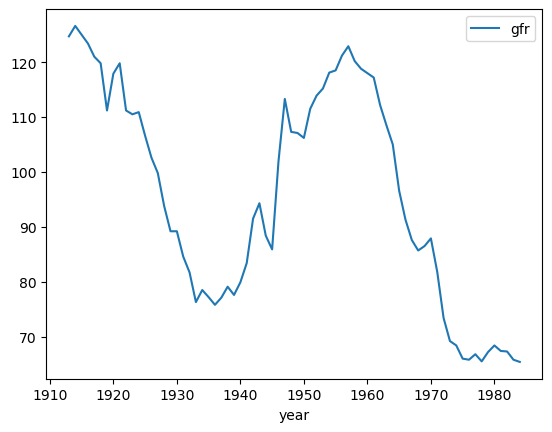

In [33]:
# Exercise 8
fertil = pd.read_stata("./stata/FERTIL3.DTA")
fertil["t_sq"] = fertil["t"].astype("int64") ** 2
fertil["t_cu"] = fertil["t"].astype("int64") ** 3
fertil["gfr_2"] = fertil["gfr_1"].shift(1)
fertil_1979 = fertil[fertil["year"] <= 1979]
fertil_1980 = fertil[fertil["year"] > 1979]
fertil.plot("year", "gfr")

In [34]:
X = sm.add_constant(fertil_1979[["t", "t_sq", "t_cu"]])
model = sm.OLS(fertil_1979.gfr, X, missing="drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gfr   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     59.47
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           2.32e-18
Time:                        12:01:03   Log-Likelihood:                -246.23
No. Observations:                  67   AIC:                             500.5
Df Residuals:                      63   BIC:                             509.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        148.7082      5.093     29.200      0.000     138.531     158.885
t             -6.9042      0.644    -10.724      0.000      -8.191      -5.618
t_sq           0.2426      0.022     11.072      0.000       0.199       0.286
t_cu          -0.0024      0.000    -11.417      0.000      -0.003      -0.002
==============================================================================
Omnibus:                       26.252   Durbin-Watson:                   0.217
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.601
Skew:                           0.022   Prob(JB):                        0.100
Kurtosis:                       1.717   Cond. No.                     4.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
X = sm.add_constant(fertil_1980[["t", "t_sq", "t_cu"]])
abs(model.predict(X) - fertil_1980["gfr"]).sum() / len(fertil_1980["gfr"])

43.016864659031214

In [36]:
X = np.ones(len(fertil_1979.cgfr))
model = sm.OLS(fertil_1979.cgfr, X, missing="drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cgfr   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 28 Nov 2022   Prob (F-statistic):                nan
Time:                        12:01:04   Log-Likelihood:                -191.08
No. Observations:                  66   AIC:                             384.2
Df Residuals:                      65   BIC:                             386.4
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8712      0.543     -1.605      0.113      -1.955       0.213
==============================================================================
Omnibus:                       18.664   Durbin-Watson:                   1.420
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.618
Skew:                           1.020   Prob(JB):                     3.70e-07
Kurtosis:                       5.571   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
abs(fertil_1980.gfr - fertil_1980.gfr_1).sum() / len(fertil_1980.gfr)

0.8400009155273438

In [38]:
X = sm.add_constant(fertil_1979[["gfr_1", "gfr_2"]])
model = sm.OLS(fertil_1979.gfr, X, missing="drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gfr   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     571.7
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           1.12e-40
Time:                        12:01:04   Log-Likelihood:                -184.77
No. Observations:                  65   AIC:                             375.5
Df Residuals:                      62   BIC:                             382.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2157      2.924      1.100      0.276      -2.630       9.061
gfr_1          1.2721      0.120     10.571      0.000       1.032       1.513
gfr_2         -0.3114      0.121     -2.565      0.013      -0.554      -0.069
==============================================================================
Omnibus:                       19.953   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.345
Skew:                           0.978   Prob(JB):                     2.86e-09
Kurtosis:                       6.271   Cond. No.                         784.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
X = sm.add_constant(fertil_1980[["gfr_1", "gfr_2"]])
abs(fertil_1980["gfr"] - model.predict(X)).sum() / len(fertil_1980["gfr"])

0.9905737391982882

C8.i Graph above. While gfr has decreased over time, it could not be called a clear downward trend (it has increased and decreased over the period).

C8.ii Results above. The R-squared is quite high, suggesting the cubic time trend is a good fit.

C8.iii The MAE for the one-step-ahead forecast for the cubic time trend is 43.02

C8.iv The p-value for the constant is not significant even at the 10% level. We should not assume there is a drift in the random walk.

C8.v The MAE was calculated by taking the difference between the lags. The MAE is considerably lower at 0.84 and so we should prefer the random walk.

C8.vi Results for the AR(2) model above. The second lag is significant at the 5% level.

C8.vii The MAE for the AR(2) model is 0.99, which is an improvement over the time trend, but is still now lower than the random walk. The random walk has the best out-of-sample performance of the approaches considered.

In [40]:
# Exercise 9
consump = pd.read_stata("./stata/consump.dta")
consump["y_1"] = consump["y"].shift(1)
consump["t"] = consump.index + 1
consump_1989 = consump[consump.year <= 1989]
consump_1990 = consump[consump.year > 1989]

X = sm.add_constant(consump_1989[["t", "y_1"]])
model = sm.OLS(consump_1989.y, X, missing="drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2194.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           1.31e-30
Time:                        12:01:05   Log-Likelihood:                -203.33
No. Observations:                  30   AIC:                             412.7
Df Residuals:                      27   BIC:                             416.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3186.0397   1163.091      2.739      0.011     799.573    5572.506
t            116.2376     46.315      2.510      0.018      21.208     211.268
y_1            0.6300      0.148      4.255      0.000       0.326       0.934
==============================================================================
Omnibus:                        1.729   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.421   Jarque-Bera (JB):                0.806
Skew:                           0.367   Prob(JB):                        0.668
Kurtosis:                       3.323   Cond. No.                     3.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
X = sm.add_constant(consump_1990[["t", "y_1"]])
consump_1990.loc[consump_1990.year == 1990, "y"] - model.predict(X).iloc[0]

31   -178.332031
Name: y, dtype: float32

In [42]:
abs(model.predict(X) - consump_1990.y).sum() / len(consump_1990.y)

371.7612387046999

In [43]:
X = sm.add_constant(consump_1989[["t"]])
model = sm.OLS(consump_1989.y, X, missing="drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     3046.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           6.32e-31
Time:                        12:01:06   Log-Likelihood:                -217.73
No. Observations:                  31   AIC:                             439.5
Df Residuals:                      29   BIC:                             442.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8143.1092    103.384     78.765      0.000    7931.664    8354.554
t            311.2551      5.640     55.186      0.000     299.720     322.790
==============================================================================
Omnibus:                        3.048   Durbin-Watson:                   0.730
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                1.754
Skew:                          -0.300   Prob(JB):                        0.416
Kurtosis:                       3.999   Cond. No.                         37.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
X = sm.add_constant(consump_1990[["t"]])
abs(model.predict(X) - consump_1990.y).sum() / len(consump_1990.y)

718.2621857673876

C9.i Results above

C9.ii The error is -178.33

C9.iii The MAE for the one-step-ahead forecast is 371.76

C9.iv Dropping the lag of real per capita disposable income results in a MAE of 718.26. This is considerably higher and so we should prefer the original.

In [45]:
# Exercise 10
intqrt = pd.read_stata("./stata/INTQRT.DTA")
intqrt_pre16 = intqrt.iloc[:-16]
intqrt_16 = intqrt.iloc[-16:]

X = sm.add_constant(intqrt_pre16["cr6_1"])
model = sm.OLS(intqrt_pre16.cr6, X, missing="drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cr6   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.440
Date:                Mon, 28 Nov 2022   Prob (F-statistic):             0.0665
Time:                        12:01:06   Log-Likelihood:                -180.79
No. Observations:                 106   AIC:                             365.6
Df Residuals:                     104   BIC:                             370.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0470      0.131      0.360      0.720      -0.212       0.306
cr6_1         -0.1789      0.096     -1.855      0.066      -0.370       0.012
==============================================================================
Omnibus:                       39.753   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.844
Skew:                          -1.021   Prob(JB):                     9.09e-50
Kurtosis:                       9.853   Cond. No.                         1.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
X = sm.add_constant(intqrt_16["cr6_1"])
np.sqrt(((intqrt_16.cr6 - model.predict(X))**2).sum() / len(intqrt_16.cr6))

0.7042667700541799

In [47]:
X = sm.add_constant(intqrt_pre16[["cr6_1", "spr63_1"]])
model = sm.OLS(intqrt_pre16.cr6, X, missing="drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cr6   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     4.212
Date:                Mon, 28 Nov 2022   Prob (F-statistic):             0.0174
Time:                        12:01:07   Log-Likelihood:                -178.35
No. Observations:                 106   AIC:                             362.7
Df Residuals:                     103   BIC:                             370.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3717      0.195      1.903      0.060      -0.016       0.759
cr6_1         -0.1713      0.095     -1.808      0.074      -0.359       0.017
spr63_1       -1.0447      0.474     -2.204      0.030      -1.985      -0.105
==============================================================================
Omnibus:                       31.471   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.871
Skew:                          -0.643   Prob(JB):                     9.83e-47
Kurtosis:                       9.806   Cond. No.                         5.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
X = sm.add_constant(intqrt_16[["cr6_1", "spr63_1"]])
np.sqrt(((intqrt_16.cr6 - model.predict(X))**2).sum() / len(intqrt_16.cr6))

0.7882105171302595

In [49]:
X = sm.add_constant(intqrt_pre16[["r3"]])
model = sm.OLS(intqrt_pre16.r6, X, missing="drop").fit()
ci = model.params[-1]
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     r6   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.781e+04
Date:                Mon, 28 Nov 2022   Prob (F-statistic):          6.38e-120
Time:                        12:01:07   Log-Likelihood:                -4.6904
No. Observations:                 108   AIC:                             13.38
Df Residuals:                     106   BIC:                             18.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1282      0.055      2.331      0.022       0.019       0.237
r3             1.0284      0.008    133.467      0.000       1.013       1.044
==============================================================================
Omnibus:                       27.701   Durbin-Watson:                   1.457
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.075
Skew:                           0.368   Prob(JB):                     3.63e-49
Kurtosis:                      10.002   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
intqrt["corr"] = intqrt["r6"] - (ci * intqrt["r3"])
intqrt["corr_1"] = intqrt["corr"].shift(1)
intqrt_pre16 = intqrt.iloc[:-16]
intqrt_16 = intqrt.iloc[-16:]

X = sm.add_constant(intqrt_pre16[["cr6_1", "corr_1"]])
model = sm.OLS(intqrt_pre16.cr6, X, missing="drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cr6   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     3.172
Date:                Mon, 28 Nov 2022   Prob (F-statistic):             0.0461
Time:                        12:01:07   Log-Likelihood:                -179.35
No. Observations:                 106   AIC:                             364.7
Df Residuals:                     103   BIC:                             372.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1578      0.145      1.086      0.280      -0.130       0.446
cr6_1         -0.1839      0.096     -1.922      0.057      -0.374       0.006
corr_1        -0.8572      0.508     -1.686      0.095      -1.865       0.151
==============================================================================
Omnibus:                       38.495   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.721
Skew:                          -0.927   Prob(JB):                     4.39e-54
Kurtosis:                      10.225   Cond. No.                         5.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
X = sm.add_constant(intqrt_16[["cr6_1", "spr63_1"]])
np.sqrt(((intqrt_16.cr6 - model.predict(X))**2).sum() / len(intqrt_16.cr6))

0.7745065880021943

C10.i Results above. The RSME is 0.70

C10.ii Results above. The RSME is 0.79, and so the correction has not improved out-of-sample performance.

C10.iii The RSME falls to 0.78 and so the out-of-sample performance has improved from part ii but not from part i.

C10.iv The conclusions would not change if r6 was being predicted directly instead of the change.

In [52]:
# Exercise 11
volat = pd.read_stata("./stata/VOLAT.DTA")
volat["lsp500"] = np.log(volat["sp500"])
volat["lip"] = np.log(volat["ip"])

tsa.adfuller(volat["lsp500"], maxlag=4, autolag=None)

(-0.7936498871132008,
 0.8209802523027218,
 4,
 553,
 {'1%': -3.4422304958001386,
  '5%': -2.866780664287393,
  '10%': -2.5695611022893377})

In [53]:
tsa.adfuller(volat["lsp500"], maxlag=4, autolag=None, regression="ct")

(-2.201160979857901,
 0.48919710733183025,
 4,
 553,
 {'1%': -3.9752346393498446,
  '5%': -3.4184590566681585,
  '10%': -3.131738554850128})

In [54]:
tsa.adfuller(volat["lip"], maxlag=4, autolag=None)

(-1.3716621100224609,
 0.595783760657201,
 4,
 553,
 {'1%': -3.4422304958001386,
  '5%': -2.866780664287393,
  '10%': -2.5695611022893377})

In [55]:
tsa.adfuller(volat["lip"], maxlag=4, autolag=None, regression="ct")

(-2.518587527241066,
 0.3187323648640068,
 4,
 553,
 {'1%': -3.9752346393498446,
  '5%': -3.4184590566681585,
  '10%': -3.131738554850128})

In [56]:
X = sm.add_constant(volat["lip"])
model = sm.OLS(volat.lsp500, X, missing="drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lsp500   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     5179.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):          6.44e-284
Time:                        12:01:08   Log-Likelihood:                -62.945
No. Observations:                 558   AIC:                             129.9
Df Residuals:                     556   BIC:                             138.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4017      0.095    -25.153      0.000      -2.589      -2.214
lip            1.6941      0.024     71.966      0.000       1.648       1.740
==============================================================================
Omnibus:                       34.412   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.057
Skew:                          -0.017   Prob(JB):                      0.00146
Kurtosis:                       2.251   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
tsa.adfuller(model.resid, maxlag=2, autolag=None)

(-1.5726221205230544,
 0.49733006505815014,
 2,
 555,
 {'1%': -3.44218748274498,
  '5%': -2.8667617276005006,
  '10%': -2.569551011281552})

In [58]:
volat["t"] = volat.index + 1

X = sm.add_constant(volat[["lip", "t"]])
model = sm.OLS(volat.lsp500, X, missing="drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lsp500   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     3260.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):          1.80e-307
Time:                        12:01:09   Log-Likelihood:                -3.8902
No. Observations:                 558   AIC:                             13.78
Df Residuals:                     555   BIC:                             26.75
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8738      0.384      4.885      0.000       1.120       2.627
lip            0.3439      0.120      2.867      0.004       0.108       0.579
t              0.0042      0.000     11.438      0.000       0.003       0.005
==============================================================================
Omnibus:                      952.306   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.729
Skew:                          -0.238   Prob(JB):                     1.94e-10
Kurtosis:                       1.697   Cond. No.                     1.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
tsa.adfuller(model.resid, maxlag=2, autolag=None)

(-1.8765736714934922,
 0.3431605600069282,
 2,
 555,
 {'1%': -3.44218748274498,
  '5%': -2.8667617276005006,
  '10%': -2.569551011281552})

C11.i The Dickey-Fuller tests are above, but difficult to read. The test statistic is the top number and the p-value is the second. None of the tests reject the null hypothesis of a unit root, even at the 10% level.

C11.ii The t-statistic is very high and the $R^2$ is over 0.9. We are likely dealing with a spurious regression.

C11.iii We do not find evidence to reject the null of a unit root even at the 10% level. We do not have evidence of cointegration.

C11.iv Adding the time trend does not fix things. The p-value is 0.34 so we still do not have evidence of cointegration.

C11.v There is no evidence that stock prices and real economic activity have a long-run equilibrium relationship. If they did, we would have expected to see cointegration.